In [1]:
begin #=Variables used in the construction of the local matrices=#
    using SymPy
    using Plots
    using LinearAlgebra
    x,a,b = Sym("x,a,b")
    end;

In [2]:
begin #=First-order Lagrange polynomials for a general finite element Ω (on the interval [-1,1])=#
    pa(x) = subs(((x-b)/(a-b)),(a,-1),(b,1)) #=Negative angular coefficient=#
    pb(x) = subs(((x-a)/(b-a)),(a,-1),(b,1)) #=Positive angular coefficient=#
    dpa = diff(pa(x),x) #=Derivatives=#
    dpb = diff(pb(x),x)
    end;

In [3]:
begin #=Local matrix Aᵢⱼᵉ=∫Φ'ᵢ(x)Φ'ⱼ(x)dx in Ωᵉ=#
    a1 = integrate(dpa*dpa,(x,-1,1))
    a2 = integrate(dpa*dpb,(x,-1,1))
    a3 = integrate(dpb*dpa,(x,-1,1))
    a4 = integrate(dpb*dpb,(x,-1,1))
    Ae = [a1 a2; a3 a4]
end

2×2 Matrix{Sym}:
  1/2  -1/2
 -1/2   1/2

In [4]:
begin #=Local matrix Cᵢⱼᵉ=∫Φᵢ(x)Φⱼ(x)dx in Ωᵉ=#
    c1 = integrate(pa(x)*pa(x),(x,-1,1))
    c2 = integrate(pa(x)*pb(x),(x,-1,1))
    c3 = integrate(pb(x)*pa(x),(x,-1,1))
    c4 = integrate(pb(x)*pb(x),(x,-1,1))
    Ce = [c1 c2; c3 c4]
end

2×2 Matrix{Sym}:
 2/3  1/3
 1/3  2/3

In [5]:
begin 
    Nn = 20 #=Number of nodes=#
    L = 1 #=Length of relaxed string=#
    X = LinRange(0,L,Nn)
    E = 1:Nn
    LM = [0 0]
    for e in E
        LM = [LM;[e e+1]]
    end
    LM = LM[2:end-1,:] #=Vector indentifying the Nn-1 finite elements=#
end

99×2 Matrix{Int64}:
  1    2
  2    3
  3    4
  4    5
  5    6
  6    7
  7    8
  8    9
  9   10
 10   11
 11   12
 12   13
 13   14
  ⋮  
 88   89
 89   90
 90   91
 91   92
 92   93
 93   94
 94   95
 95   96
 96   97
 97   98
 98   99
 99  100

In [6]:
begin #=Contructing global matrix Aᵢⱼ=∫Φ'ᵢ(x)Φ'ⱼ(x)dx=#
    he = X[2]-X[1] #=Spatial step Δx=#
    A = zeros((Nn,Nn))
    for e in 1:(Nn-1)
        globalP = LM[e,:]
        localP = globalP.-(e-1)
        g_i = globalP[1]
        g_j = globalP[2]
        l_i = localP[1]
        l_j = localP[2]
        A[g_i,g_i] += 2*Ae[l_i,l_i]/he 
        A[g_i,g_j] += 2*Ae[l_i,l_j]/he
        A[g_j,g_i] += 2*Ae[l_j,l_i]/he
        A[g_j,g_j] += 2*Ae[l_j,l_j]/he
    end
    A 
end

100×100 Matrix{Float64}:
  99.0  -99.0    0.0    0.0    0.0  …    0.0    0.0    0.0    0.0    0.0
 -99.0  198.0  -99.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0  -99.0  198.0  -99.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0  -99.0  198.0  -99.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0  -99.0  198.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0  -99.0  …    0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0  …    0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   ⋮                      

In [7]:
begin #=Contructing global matrix Cᵢⱼ=∫Φᵢ(x)Φⱼ(x)dx=#
    C = zeros((Nn,Nn))
    for e in 1:(Nn-1)
        globalP = LM[e,:]
        localP = globalP.-(e-1)
        g_i = globalP[1]
        g_j = globalP[2]
        l_i = localP[1]
        l_j = localP[2]
        C[g_i,g_i] += he*Ce[l_i,l_i]/2 
        C[g_i,g_j] += he*Ce[l_i,l_j]/2
        C[g_j,g_i] += he*Ce[l_j,l_i]/2
        C[g_j,g_j] += he*Ce[l_j,l_j]/2
    end
    C
end

100×100 Matrix{Float64}:
 0.003367   0.0016835   0.0         …  0.0         0.0         0.0
 0.0016835  0.00673401  0.0016835      0.0         0.0         0.0
 0.0        0.0016835   0.00673401     0.0         0.0         0.0
 0.0        0.0         0.0016835      0.0         0.0         0.0
 0.0        0.0         0.0            0.0         0.0         0.0
 0.0        0.0         0.0         …  0.0         0.0         0.0
 0.0        0.0         0.0            0.0         0.0         0.0
 0.0        0.0         0.0            0.0         0.0         0.0
 0.0        0.0         0.0            0.0         0.0         0.0
 0.0        0.0         0.0            0.0         0.0         0.0
 0.0        0.0         0.0         …  0.0         0.0         0.0
 0.0        0.0         0.0            0.0         0.0         0.0
 0.0        0.0         0.0            0.0         0.0         0.0
 ⋮                                  ⋱                          
 0.0        0.0         0.0            0

In [8]:
begin #=Constructing matrix on the left-hand side of (11) (see LaTeX)=#
    Cl = C #=Index l for "left"=#
    Cl[1,1] = 1 #=Imposing boundary conditions=#
    Cl[1,2] = 0
    Cl[2,1] = 0
    Cl[end,end] = 1
    Cl[end,end-1] = 0
    Cl[end-1,end] = 0
    Ml = [Cl zeros((Nn,Nn)); zeros((Nn,Nn)) Cl]
    Ml
end

200×200 Matrix{Float64}:
 1.0  0.0         0.0         0.0         …  0.0         0.0         0.0
 0.0  0.00673401  0.0016835   0.0            0.0         0.0         0.0
 0.0  0.0016835   0.00673401  0.0016835      0.0         0.0         0.0
 0.0  0.0         0.0016835   0.00673401     0.0         0.0         0.0
 0.0  0.0         0.0         0.0016835      0.0         0.0         0.0
 0.0  0.0         0.0         0.0         …  0.0         0.0         0.0
 0.0  0.0         0.0         0.0            0.0         0.0         0.0
 0.0  0.0         0.0         0.0            0.0         0.0         0.0
 0.0  0.0         0.0         0.0            0.0         0.0         0.0
 0.0  0.0         0.0         0.0            0.0         0.0         0.0
 0.0  0.0         0.0         0.0         …  0.0         0.0         0.0
 0.0  0.0         0.0         0.0            0.0         0.0         0.0
 0.0  0.0         0.0         0.0            0.0         0.0         0.0
 ⋮                        

In [9]:
begin #=Constructing matrix on the right-hand side of (11) (see LaTeX)=#
    c = 1 #=speed of sound=#
    Cr = C #=Index r for "right"=#
    Cr[1,1] = 0
    Cr[1,2] = 0
    Cr[2,1] = 0
    Cr[end,end] = 0
    Cr[end,end-1] = 0
    Cr[end-1,end] = 0
    Ar = A #=Index r for "right"=#
    Ar[1,1] = 0
    Ar[1,2] = 0
    Ar[2,1] = 0
    Ar[end,end] = 0
    Ar[end,end-1] = 0
    Ar[end-1,end] = 0
    Mr = [zeros((Nn,Nn)) Cr; -(c^2).*Ar zeros((Nn,Nn))]
    Mr
end

200×200 Matrix{Float64}:
  0.0   0.0   0.0   0.0   0.0   0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  ⋮          

In [10]:
begin #=Constructing matrix M (see equation (19) in LaTeX)=#
    M = inv(Ml)*Mr
    M
end

200×200 Matrix{Float64}:
 0.0   0.0           0.0          …   0.0           0.0          0.0
 0.0   0.0           0.0             -2.50332e-71   4.00745e-72  0.0
 0.0   0.0           0.0              1.00133e-70  -1.60298e-71  0.0
 0.0   0.0           0.0             -1.01206e-70   2.98499e-71  0.0
 0.0   0.0           0.0              1.64822e-69  -7.20867e-71  0.0
 0.0   0.0           0.0          …  -1.54094e-69   7.90983e-70  0.0
 0.0   0.0           0.0              2.85538e-68  -1.69758e-69  0.0
 0.0   0.0           0.0             -4.43143e-69   8.20324e-70  0.0
 0.0   0.0           0.0              4.14692e-68  -5.66754e-68  0.0
 0.0   0.0           0.0             -2.87224e-67   3.34785e-67  0.0
 0.0   0.0           0.0          …   3.62007e-66   2.36938e-67  0.0
 0.0   0.0           0.0             -1.06452e-65   1.49194e-67  0.0
 0.0   0.0           0.0              9.5519e-66   -9.27022e-66  0.0
 ⋮                                ⋱                              
 0.0   1.645

In [11]:
begin #=Constructing the Crank-Nicolson matrix CK used for time evolution=#
    T = LinRange(0,2,1000) #=Time discretization=#
    Δt = 2/(1000-1) #=Time step=#
    CK = inv(I-M.*(Δt/2))*(I+M.*(Δt/2)) 
    CK
end

200×200 Matrix{Float64}:
 1.0   0.0           0.0          …   0.0           0.0          0.0
 0.0   0.932085      0.0467229        3.92304e-21   3.1474e-21   0.0
 0.0   0.0467229     0.920782        -3.16307e-21  -9.84421e-22  0.0
 0.0  -0.0113027     0.0494572       -1.30313e-20  -8.33389e-21  0.0
 0.0   0.00273424   -0.0119642        1.78956e-20   5.92997e-21  0.0
 0.0  -0.000661441   0.00289425   …   1.63757e-20   1.44779e-20  0.0
 0.0   0.000160009  -0.000700149      1.28153e-20   3.14191e-20  0.0
 0.0  -3.87078e-5    0.000169373      6.98222e-20   4.61435e-20  0.0
 0.0   9.36381e-6   -4.0973e-5        2.5729e-20    3.9785e-20   0.0
 0.0  -2.2652e-6     9.91178e-6      -4.4985e-20   -9.04347e-21  0.0
 0.0   5.47974e-7   -2.39776e-6   …  -9.79433e-20  -5.90623e-20  0.0
 0.0  -1.3256e-7     5.80042e-7       3.39636e-20   2.84283e-20  0.0
 0.0   3.20677e-8   -1.40318e-7       1.73688e-19   1.36756e-19  0.0
 ⋮                                ⋱                              
 0.0   6.082

In [88]:
begin #=Initial condition=#
    function gaussian(x,μ,σ)#=Gaussian packet with mean μ and variance σ²=#
        exp(-(x-μ)^2/(2σ)^2)
    end
    u0 = gaussian.(X,L/2,L/20).-gaussian(0,L/2,L/20) #=Initial position=#
    p0 = zeros(Nn) #=Initial velocity=#
    end;

In [89]:
begin #=Time evolution=#
    sol = zeros(length(T),2*Nn)
    sol[1,:] += [u0;p0]
    for t in 1:length(T)-1
        sol[t+1,:] += CK*sol[t,:]
    end
end

In [14]:
using Plots

┌ Info: Saved animation to 
│   fn = C:\Users\Thiago\Documents\Programming Projects\WeirdGuitarFem\tutorial_anim_fps30.gif
└ @ Plots C:\Users\Thiago\.julia\packages\Plots\FKcum\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Thiago\\Documents\\Programming Projects\\WeirdGuitarFem\\tutorial_anim_fps30.gif")
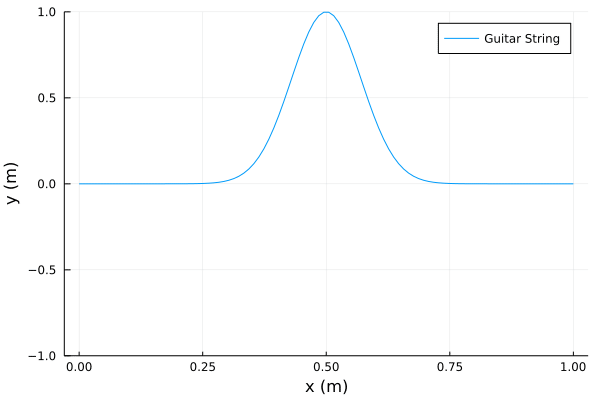

In [90]:
begin #=Plotting results=#
    using Plots
    anim = @animate for i = 1:length(T)
    plot(X,sol[i,1:Nn],ylims=(-1,1),label="Guitar String")
    xlabel!("x (m)")
    ylabel!("y (m)")
        end
 
gif(anim, "constant_c_wave.gif", fps = 30)
end

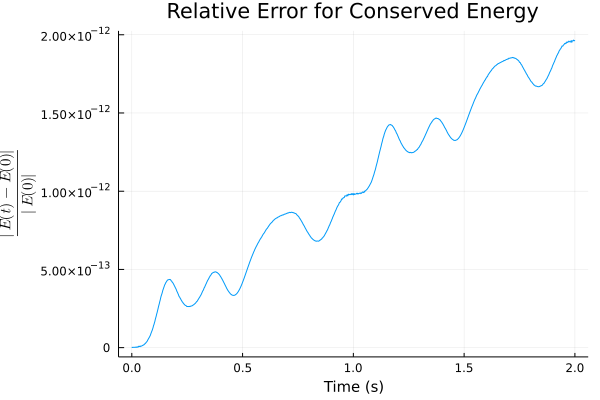

In [91]:
function energy(sol,T,C,A,c) #=Calculates total energy and plots relative error=#
    U = sol[:,1:Nn] #=Position=#
    P = sol[:,Nn+1:end] #=Velocity=#
    E = zeros(length(T))
    E0 = 1/2*1/c^2*(transpose(P[1,:])*C*P[1,:])+1/2*(transpose(U[1,:])*A*U[1,:]) #=Initial energy=#
    E[1] += E0
    for t in 2:length(T)
        E[t] += 1/2*1/c^2*(transpose(P[t,:])*C*P[t,:])+1/2*(transpose(U[t,:])*A*U[t,:]) #=Energy=#
    end
    Erel = abs.((E.-E0)./E0) #=Relative error=#
    plot(T,Erel,title="Relative Error for Conserved Energy",label="")
    xlabel!("Time (s)")
    ylabel!("\$\\frac{|E(t)-E(0)|}{|E(0)|}\$",guidefontsize=10)
end

using Plots
energy(sol,T,C,A,c)#=Arguments: solution vector sol, time grid T, FEM matrix functions C, FEM matrix derivatives A, speed of sound c=#